<h1>Principal Component Analysis<h1>
<h4>Load in data and libraries. Determine size of data and number of columns<h4>

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('full_mag_insulators.csv')
df.head()

,material_id,formula,band_gap,ordering,numberofelements,density_atomic,elements,volume,nsites,composition,...,density,symmetry,structure,efermi,cbm,vbm,formation_energy_per_atom,energy_above_hull,is_gap_direct,is_stable
0,mp-11107,Ac2O3,3.5226,NM,2,18.302245,"[Element Ac, Element O]",91.511224,5,Ac2 O3,...,9.109130,crystal_system=<CrystalSystem.trig: 'Trigonal'...,Full Formula (Ac2 O3)\nReduced Formula: Ac2O3\...,4.696451,8.1122,4.5896,-3.737668,0.0000,False,True
1,mp-977351,Ac2S3,3.0275,NM,2,32.846489,"[Element Ac, Element S]",328.464893,10,Ac4 S6,...,5.562971,crystal_system=<CrystalSystem.trig: 'Trigonal'...,Full Formula (Ac4 S6)\nReduced Formula: Ac2S3\...,3.008090,5.9344,2.9069,-2.440364,0.0527,False,False
2,mp-1183115,AcAlO3,4.1024,NM,3,11.490283,"[Element Ac, Element Al, Element O]",57.451413,5,Ac1 Al1 O3,...,8.728230,crystal_system=<CrystalSystem.cubic: 'Cubic'> ...,Full Formula (Ac1 Al1 O3)\nReduced Formula: Ac...,6.948866,10.9060,6.8036,-3.690019,0.0000,True,True
3,mp-27972,AcBr3,4.1033,NM,2,34.116118,"[Element Ac, Element Br]",272.928947,8,Ac2 Br6,...,5.679086,crystal_system=<CrystalSystem.hex_: 'Hexagonal...,Full Formula (Ac2 Br6)\nReduced Formula: AcBr3...,1.176334,5.1408,1.0375,-2.494519,0.0000,False,True
4,mp-30274,AcBrO,4.2410,NM,3,23.356568,"[Element Ac, Element Br, Element O]",140.139410,6,Ac2 Br2 O2,...,7.652290,crystal_system=<CrystalSystem.tet: 'Tetragonal...,Full Formula (Ac2 Br2 O2)\nReduced Formula: Ac...,3.299849,7.4418,3.2008,-3.396186,0.0000,True,True


In [21]:
print(len(df))

154803


In [13]:
#PCA only works on numeric data, so we need to filter out non-numeric columns
numeric_df = df.select_dtypes(include=[float, int])
len(numeric_df.columns)

11

<h4>Set data to have mean of zero and variance of 1 to make PCA easier. Replace NaN values with mean of each column so that the row can be used without influencing the average of the column with the missing value.<h4>

In [14]:
#Scale the data to have mean=0 and variance=1
scaled_df = preprocessing.scale(numeric_df)
scaled_df = pd.DataFrame(scaled_df, columns=numeric_df.columns)
scaled_df.head()

,band_gap,numberofelements,density_atomic,volume,nsites,density,efermi,cbm,vbm,formation_energy_per_atom,energy_above_hull
0,1.626931,-1.47485,-0.081794,-0.711064,-0.758952,1.442260,0.583080,1.965610,1.184855,-1.903043,-0.388178
1,1.299395,-1.47485,0.258334,-0.310387,-0.614937,0.157185,-0.027279,1.016966,0.480616,-0.824114,-0.271926
2,2.010500,-0.46672,-0.241097,-0.768657,-0.758952,1.304227,1.397350,3.182581,2.111452,-1.863415,-0.388178
3,2.011095,-1.47485,0.288025,-0.404295,-0.672543,0.199263,-0.689476,0.671276,-0.301760,-0.869153,-0.388178
4,2.102191,-0.46672,0.036405,-0.628836,-0.730149,0.914323,0.078195,1.673585,0.603618,-1.619043,-0.388178


In [15]:
#Replaces NaN values with the mean of each column
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
scaled_df = pd.DataFrame(imputer.fit_transform(scaled_df), columns=scaled_df.columns)

In [16]:
pca = PCA()
pca.fit(scaled_df)

PCA()

<h4>Scree Plot let us see how much each principal component contributes to the variance. Most of the variance is explained by the first 8 principal components. <h4>

[30.8 23.4 12.8  8.2  7.6  5.7  5.   3.3  2.1  0.8  0.3]


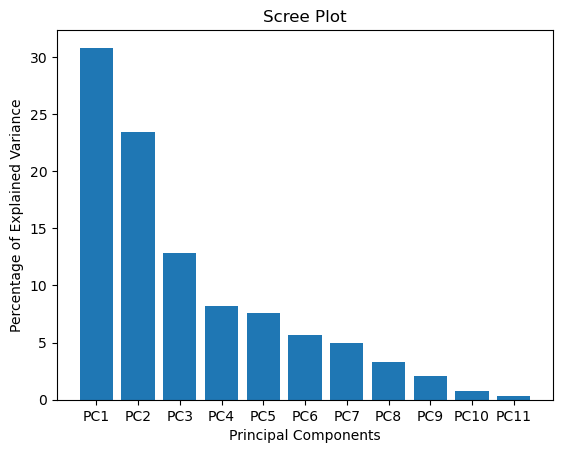

In [17]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
print(per_var)
labels = [f'PC{i}' for i in range(1, len(per_var) + 1)]
plt.bar(x = range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

<h4> Lists the breakdown of each principal components in terms of features.<h4>

In [18]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=scaled_df.columns)
print(loadings)

                                PC1       PC2       PC3       PC4       PC5  \
band_gap                  -0.346491 -0.209787 -0.279065  0.045132  0.610909   
numberofelements          -0.333594 -0.213847  0.077227  0.476038 -0.478171   
density_atomic            -0.078589  0.465219  0.170536  0.233794  0.447078   
volume                    -0.388183  0.074840  0.568414 -0.207405  0.154447   
nsites                    -0.403958 -0.161237  0.489972 -0.204399 -0.090364   
density                    0.408873 -0.134946  0.228281 -0.242942  0.128821   
efermi                     0.412715 -0.236047  0.384887  0.104337  0.029323   
cbm                        0.116020 -0.302626  0.131231  0.388722  0.370781   
vbm                        0.210679 -0.208171  0.251052  0.406512  0.056332   
formation_energy_per_atom  0.228028  0.462209  0.191470 -0.121389 -0.050707   
energy_above_hull         -0.035497  0.489641  0.082160  0.480516 -0.074616   

                                PC6       PC7      

<h3> Previous analysis using a smaller data set without columns the directly correlated with magnetism. Removal of these columns was necessary to not bias data, however our new data set does not load in these columns to begin with.<h3>

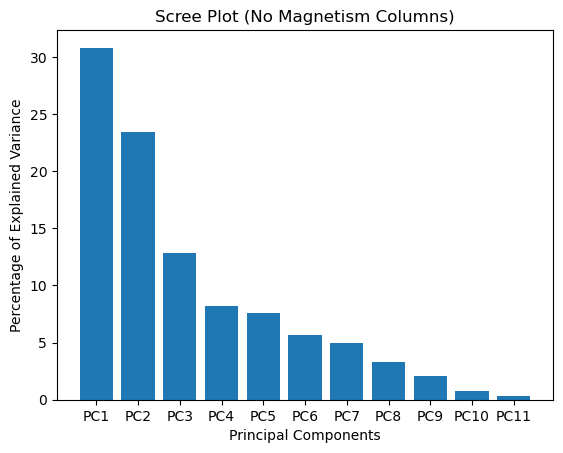

In [19]:
# List columns related to magnetism (replace with actual column names)
magnetism_cols = ['total_magnetization_normalized_vol', 'num_magnetic_sites', 'num_unique_magnetic_sites']  # example names

# Remove magnetism-related columns from numeric_df
numeric_df_no_mag = numeric_df.drop(columns=[col for col in magnetism_cols if col in numeric_df.columns])

# Scale the filtered data
scaled_df_no_mag = preprocessing.scale(numeric_df_no_mag)
scaled_df_no_mag = pd.DataFrame(scaled_df_no_mag, columns=numeric_df_no_mag.columns)

# Impute missing values if needed
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
scaled_df_no_mag = pd.DataFrame(imputer.fit_transform(scaled_df_no_mag), columns=scaled_df_no_mag.columns)

# Fit PCA
pca = PCA()
pca.fit(scaled_df_no_mag)

# Scree plot
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [f'PC{i}' for i in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot (No Magnetism Columns)')
plt.show()



In [20]:
# Loadings
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=scaled_df_no_mag.columns
)
print(loadings)

                                PC1       PC2       PC3       PC4       PC5  \
band_gap                  -0.346491 -0.209787 -0.279065  0.045132  0.610909   
numberofelements          -0.333594 -0.213847  0.077227  0.476038 -0.478171   
density_atomic            -0.078589  0.465219  0.170536  0.233794  0.447078   
volume                    -0.388183  0.074840  0.568414 -0.207405  0.154447   
nsites                    -0.403958 -0.161237  0.489972 -0.204399 -0.090364   
density                    0.408873 -0.134946  0.228281 -0.242942  0.128821   
efermi                     0.412715 -0.236047  0.384887  0.104337  0.029323   
cbm                        0.116020 -0.302626  0.131231  0.388722  0.370781   
vbm                        0.210679 -0.208171  0.251052  0.406512  0.056332   
formation_energy_per_atom  0.228028  0.462209  0.191470 -0.121389 -0.050707   
energy_above_hull         -0.035497  0.489641  0.082160  0.480516 -0.074616   

                                PC6       PC7      